Telco Churn Dataset and Project can be found here: https://www.kaggle.com/blastchar/telco-customer-churn

# Problem statement: 1) Better understand the drivers of churn 2) Predict customer churn

In [4]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
path = './WA_Fn-UseC_-Telco-Customer-Churn.csv'
churn = pd.read_csv(path)
pd.options.display.max_columns = None

In [6]:
#train/test split 
train = churn.sample(frac=.9)
mask = ~churn.index.isin(train.index)
test = churn[mask].copy()
print(train.shape[0],test.shape[0])

6339 704


In [72]:
type(churn)
train.dtypes #confirm data types
churn.isnull().sum() #confirm no null values

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [15]:
#Data Transformations

#change "yes", "no", and "No internet service" to 1, 0, and 2 respectively
train.Churn.replace(('Yes', 'No'), (1, 0), inplace=True)
train.Partner.replace(('Yes', 'No','No internet service'), (1, 0, 2), inplace=True)
train.Dependents.replace(('Yes', 'No','No internet service'), (1, 0, 2), inplace=True)
train.PhoneService.replace(('Yes', 'No','No internet service'), (1, 0, 2), inplace=True)
train.MultipleLines.replace(('Yes', 'No','No internet service'), (1, 0, 2), inplace=True)
train.OnlineSecurity.replace(('Yes', 'No','No internet service'), (1, 0, 2), inplace=True)
train.OnlineBackup.replace(('Yes', 'No','No internet service'), (1, 0, 2), inplace=True)
train.DeviceProtection.replace(('Yes', 'No','No internet service'), (1, 0, 2), inplace=True)
train.TechSupport.replace(('Yes', 'No','No internet service'), (1, 0, 2), inplace=True)
train.StreamingTV.replace(('Yes', 'No','No internet service'), (1, 0, 2), inplace=True)
train.PaperlessBilling.replace(('Yes', 'No','No internet service'), (1, 0, 2), inplace=True)
train.StreamingMovies.replace(('Yes', 'No','No internet service'), (1, 0, 2), inplace=True)
train.gender.replace(('Male', 'Female'), (1, 0), inplace=True)

#Creating binary columns so I can count the number of services a customer uses
train["InternetServiceBinary"] = np.where(train['InternetService'] == "No",0,1)
train["PhoneServiceBinary"] = np.where(train['PhoneService'] == 1,1,0)
train["OnlineSecurityBinary"] = np.where(train['OnlineSecurity'] == 1,1,0)
train["OnlineBackupBinary"] = np.where(train['OnlineBackup']  == 1,1,0)
train["DeviceProtectionBinary"] = np.where(train['DeviceProtection']  == 1,1,0)
train["TechSupportBinary"] = np.where(train['TechSupport']  == 1,1,0)
train["StreamingTVBinary"] = np.where(train['StreamingTV']  == 1,1,0)
train["StreamingMoviesBinary"] = np.where(train['StreamingMovies']  == 1,1,0)

#Creating a column with the count of the number of services
train["NumberOfServices"] = train['PhoneServiceBinary'] + train['InternetServiceBinary'] + train['OnlineSecurityBinary'] + train['OnlineBackupBinary'] + train['DeviceProtectionBinary'] +train['TechSupportBinary'] + train['StreamingTVBinary'] + train['StreamingMoviesBinary']

#convert Total Charges to float
train['TotalChargesFloat']= train.TotalCharges
train['TotalChargesFloat']= pd.to_numeric(train['TotalChargesFloat'],errors='coerce')

#create tenure dummy variables
train["Tenure0-1year"] = np.where(train["tenure"] <= 12, 1, 0)
train["Tenure1-2year"] = np.where((train["tenure"] <= 24) & (train['tenure'] > 12), 1, 0)
train["Tenure2-3year"] = np.where((train["tenure"] <= 36) & (train['tenure'] > 24), 1, 0)
train["Tenure3-4year"] = np.where((train["tenure"] <= 48) & (train['tenure'] > 36), 1, 0)
train["Tenure4-5year"] = np.where((train["tenure"] <= 60) & (train['tenure'] > 48), 1, 0)
train["Tenure5-6year"] = np.where((train["tenure"] <= 72) & (train['tenure'] > 60), 1, 0)

#Scale Monthly Charges and Total Charges
train['MonthlyChargesScaled'] = (train.MonthlyCharges - train.MonthlyCharges.mean())/train.MonthlyCharges.std()
train['TotalChargesScaled'] = (train.TotalChargesFloat - train.TotalChargesFloat.mean())/train.TotalChargesFloat.std()

#Create new dummys for Month to Month, Fiber Optic, and Electronic Check
train['MonthToMonth'] = np.where(train["Contract"] == 'Month-to-month', 1, 0)
train['FiberOptic'] = np.where(train["InternetService"] == 'Fiber optic', 1, 0)
train['ElectronicCheck'] = np.where(train["PaymentMethod"] == 'Electronic Check', 1, 0)

In [74]:
train.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,InternetServiceBinary,PhoneServiceBinary,OnlineSecurityBinary,OnlineBackupBinary,DeviceProtectionBinary,TechSupportBinary,StreamingTVBinary,StreamingMoviesBinary,NumberOfServices,TotalChargesFloat,Tenure0-1year,Tenure1-2year,Tenure2-3year,Tenure3-4year,Tenure4-5year,Tenure5-6year,MonthlyChargesScaled,TotalChargesScaled,MonthToMonth,FiberOptic,ElectronicCheck
5473,1208-NBVFH,1,0,1,1,20,1,0,DSL,0,0,1,0,0,0,Month-to-month,1,Electronic check,49.60,939.8,0,1,1,0,0,1,0,0,0,3,939.80,0,1,0,0,0,0,-0.498320,-0.592932,1,0,0
2098,4137-BTIKL,1,0,0,0,2,1,1,Fiber optic,1,0,0,0,0,1,Month-to-month,0,Mailed check,90.75,174.75,0,1,1,1,0,0,0,0,1,4,174.75,1,0,0,0,0,0,0.864632,-0.929824,1,1,0
1726,1958-RNRKS,1,0,1,0,30,1,1,DSL,0,0,0,0,0,0,Month-to-month,0,Electronic check,49.90,1441.95,0,1,1,0,0,0,0,0,0,2,1441.95,0,0,1,0,0,0,-0.488383,-0.371809,1,0,0
1780,0516-VRYBW,0,0,0,1,18,1,0,No,2,2,2,2,2,2,One year,0,Bank transfer (automatic),20.15,390.85,1,0,1,0,0,0,0,0,0,1,390.85,0,1,0,0,0,0,-1.473750,-0.834664,0,0,0
3301,2636-ALXXZ,0,1,0,0,1,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,69.60,69.6,1,1,1,0,0,0,0,0,0,2,69.60,1,0,0,0,0,0,0.164111,-0.976127,1,1,0


In [75]:
train.Churn.mean() #baseline

0.26108218961981383

In [76]:
train.tenure.describe()

count    6339.000000
mean       32.436346
std        24.557070
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

In [77]:
train.groupby(['NumberOfServices'])['Churn'].agg(['mean','count'])
#with the exclusion of customers using 1 service; more services means less churn

,mean,count
NumberOfServices,,
1,0.088356,1460
2,0.508321,661
3,0.422374,876
4,0.342612,934
5,0.275161,934
6,0.226614,759
7,0.123173,479
8,0.050847,236


In [78]:
train.groupby(['gender'])['Churn'].agg(['mean','count'])
#no material difference in churn between genders

,mean,count
gender,,
0,0.264415,3139
1,0.257812,3200


In [79]:
train.groupby(['SeniorCitizen'])['Churn'].agg(['mean','count'])
#Senior Citizens are 2X as likely to Churn

,mean,count
SeniorCitizen,,
0,0.233233,5308
1,0.404462,1031


In [80]:
train.groupby(['Contract'])['Churn'].agg(['mean','count'])
#Month-to-Month is between 4X and 20X  more likely to churn compared to 1-year and 2-year contracts

,mean,count
Contract,,
Month-to-month,0.421521,3485
One year,0.109940,1328
Two year,0.026212,1526


In [81]:
train.groupby(['PaymentMethod'])['Churn'].agg(['mean','count'])
#Electronic Check is 2-3X more likely to churn

,mean,count
PaymentMethod,,
Bank transfer (automatic),0.161681,1404
Credit card (automatic),0.148500,1367
Electronic check,0.445851,2133
Mailed check,0.190941,1435


In [82]:
train.groupby(['Contract','PaymentMethod'])['Churn'].agg(['mean','count'])
#Electronic Check has highest churn rates for all types of contracts, followed by Bank Transfer and Credit card
#which have similar churn rates further followed by Mailed Check

mean  count
Contract       PaymentMethod                             
Month-to-month Bank transfer (automatic)  0.337058    537
               Credit card (automatic)    0.327083    480
               Electronic check           0.528529   1665
               Mailed check               0.312578    803
One year       Bank transfer (automatic)  0.088571    350
               Credit card (automatic)    0.094183    361
               Electronic check           0.193038    316
               Mailed check               0.066445    301
Two year       Bank transfer (automatic)  0.029014    517
               Credit card (automatic)    0.022814    526
               Electronic check           0.065789    152
               Mailed check               0.009063    331

In [83]:
train.groupby(['PaperlessBilling'])['Churn'].agg(['mean','count'])
#Paperless Billing is far more likely to Churn

,mean,count
PaperlessBilling,,
0,0.157569,2583
1,0.332268,3756


In [84]:
train.groupby(['InternetService'])['Churn'].agg(['mean','count'])
#Fiber Optic is far more likely to Churn than DSL or No Internet

,mean,count
InternetService,,
DSL,0.186955,2177
Fiber optic,0.414924,2774
No,0.069885,1388


In [85]:
train.groupby(['Contract','PaymentMethod'])['Churn'].agg(['mean','count'])
#Electronic Check has highest churn rates for all types of contracts, followed by Bank Transfer and Credit card
#which have similar churn rates further followed by Mailed Check

mean  count
Contract       PaymentMethod                             
Month-to-month Bank transfer (automatic)  0.337058    537
               Credit card (automatic)    0.327083    480
               Electronic check           0.528529   1665
               Mailed check               0.312578    803
One year       Bank transfer (automatic)  0.088571    350
               Credit card (automatic)    0.094183    361
               Electronic check           0.193038    316
               Mailed check               0.066445    301
Two year       Bank transfer (automatic)  0.029014    517
               Credit card (automatic)    0.022814    526
               Electronic check           0.065789    152
               Mailed check               0.009063    331

In [86]:
train.groupby(['PhoneService'])['Churn'].agg(['mean','count'])
#neglible difference in Phone Service

,mean,count
PhoneService,,
0,0.242424,627
1,0.263130,5712


In [87]:
train.groupby(['OnlineSecurityBinary'])['Churn'].agg(['mean','count'])
#Those with no online security are more likely to churn

,mean,count
OnlineSecurityBinary,,
0,0.307931,4514
1,0.145205,1825


In [88]:
train.groupby(['OnlineBackupBinary'])['Churn'].agg(['mean','count'])
#Those with no online backup are more likely to churn

,mean,count
OnlineBackupBinary,,
0,0.285921,4148
1,0.214058,2191


In [89]:
train.groupby(['DeviceProtectionBinary'])['Churn'].agg(['mean','count'])
#Those with no Device Protection are more likely to churn

,mean,count
DeviceProtectionBinary,,
0,0.281348,4155
1,0.222527,2184


In [90]:
train.groupby(['TechSupportBinary'])['Churn'].agg(['mean','count'])
#Those with no Tech Support are more likely to churn

,mean,count
TechSupportBinary,,
0,0.305451,4495
1,0.152928,1844


In [91]:
train.groupby(['StreamingTVBinary'])['Churn'].agg(['mean','count'])
#Those with Streaming TV are slightly more likely to churn

,mean,count
StreamingTVBinary,,
0,0.238400,3901
1,0.297375,2438


In [92]:
train.groupby(['StreamingMoviesBinary'])['Churn'].agg(['mean','count'])
#Those with Streaming Movies are slightly more likely to churn

,mean,count
StreamingMoviesBinary,,
0,0.239091,3873
1,0.295620,2466


In [93]:
train.groupby(['Partner','Dependents'])['Churn'].agg(['mean','count'])
#customers with partners are less likely to churn
#customers with dependents are less likely to churn

mean  count
Partner Dependents                 
0       0           0.334581   2938
        1           0.213415    328
1       0           0.254328   1502
        1           0.140038   1571

In [94]:
train.groupby(['gender','Partner'])['Churn'].agg(['mean','count'])
#minimal differences in churn rates b/w partnered men/women
#reinforces that partnered people are less likely to churn

mean  count
gender Partner                 
0      0        0.335196   1611
       1        0.189791   1528
1      0        0.309970   1655
       1        0.201942   1545

In [95]:
train.groupby(['MultipleLines'])['Churn'].agg(['mean','count'])
#Surprising to see that having multiple lines or no phone service all have similar churn rates

,mean,count
MultipleLines,,
0,0.243822,3035
1,0.285021,2677
No phone service,0.242424,627


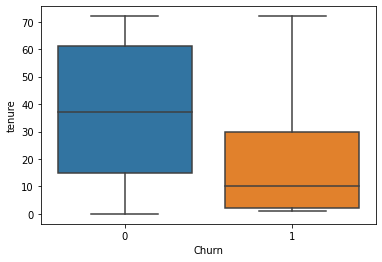

In [96]:
sns.boxplot(y=train['tenure'],x=train['Churn']);
#longer tenure means less churn

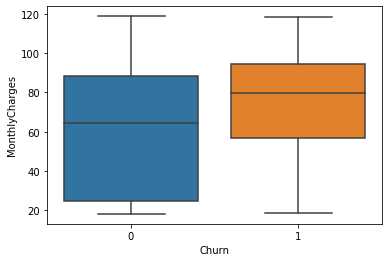

In [97]:
sns.boxplot(y=train['MonthlyCharges'],x=train['Churn']);
#higher monthly charges has a higher churn rate

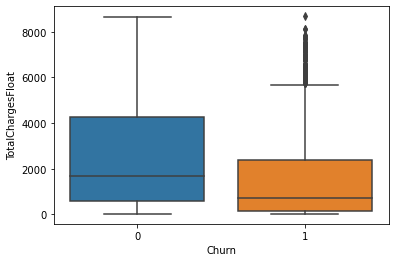

In [98]:
sns.boxplot(y=train['TotalChargesFloat'],x=train['Churn']);
#higher total charges means less churn

# EDA on Continuous Variables: Tenure, Monthly Charges, and Total Charges

Via these functions, I'm looking to identify any inflection points in the continuous data as it relates to churn. Unfortunately, there were no clear inflection points in tenure, monthly charges, and total charges varaibles so it did not help me, and is not used later. Instead of splitting the data, I used the continuous variables in my feature set. 

In [10]:
def compute_purchase_rate_at_tenure_thresholds(df,min_pct=0, max_pct=100):
    tenures = []
    # iterate through different percentages of income between 0 to 100 percent
    for i in range(min_pct,max_pct,3):
        tenure = df['tenure'].quantile(i*.01)
        if tenure in tenures:
            continue
        else:
            tenures.append(tenure)
        mask = df['tenure']>=tenure
        print('tenure above '+str(int(tenure))+ ' '+str(round(
            df[mask]['Churn'].mean(),2))+ '% of customers churned, '+str(
            df[mask].shape[0])+' in total')
    return

In [11]:
compute_purchase_rate_at_tenure_thresholds(train)

tenure above 0 0.27% of customers churned, 6339 in total
tenure above 1 0.27% of customers churned, 6329 in total
tenure above 2 0.23% of customers churned, 5778 in total
tenure above 3 0.22% of customers churned, 5563 in total
tenure above 5 0.2% of customers churned, 5225 in total
tenure above 7 0.19% of customers churned, 5012 in total
tenure above 8 0.19% of customers churned, 4897 in total
tenure above 10 0.18% of customers churned, 4677 in total
tenure above 12 0.17% of customers churned, 4485 in total
tenure above 14 0.17% of customers churned, 4280 in total
tenure above 16 0.16% of customers churned, 4116 in total
tenure above 19 0.15% of customers churned, 3886 in total
tenure above 22 0.15% of customers churned, 3702 in total
tenure above 24 0.14% of customers churned, 3546 in total
tenure above 27 0.14% of customers churned, 3319 in total
tenure above 30 0.13% of customers churned, 3139 in total
tenure above 33 0.13% of customers churned, 2953 in total
tenure above 36 0.12% 

In [101]:
def compute_purchase_rate_at_charge_thresholds(df,min_pct=0, max_pct=100):
    charges = []
    # iterate through different percentages of income between 80 and 95 percent
    for i in range(min_pct,max_pct,3):
        charge = df['MonthlyCharges'].quantile(i*.01)
        if charge in charges:
            continue
        else:
            charges.append(charge)
        mask = df['MonthlyCharges']>=charge
        print('Monthly charges above '+str(int(charge))+ ' '+str(round(
            df[mask]['Churn'].mean(),2))+ '% of customers churned, '+str(
            df[mask].shape[0])+' in total')
    return

In [102]:
compute_purchase_rate_at_charge_thresholds(train)

Monthly charges above 18 0.26% of customers churned, 6339 in total
Monthly charges above 19 0.27% of customers churned, 6171 in total
Monthly charges above 19 0.27% of customers churned, 5965 in total
Monthly charges above 20 0.28% of customers churned, 5779 in total
Monthly charges above 20 0.28% of customers churned, 5584 in total
Monthly charges above 20 0.29% of customers churned, 5402 in total
Monthly charges above 24 0.3% of customers churned, 5201 in total
Monthly charges above 25 0.31% of customers churned, 5010 in total
Monthly charges above 30 0.31% of customers churned, 4817 in total
Monthly charges above 40 0.32% of customers churned, 4627 in total
Monthly charges above 45 0.31% of customers churned, 4439 in total
Monthly charges above 50 0.31% of customers churned, 4248 in total
Monthly charges above 54 0.32% of customers churned, 4059 in total
Monthly charges above 56 0.32% of customers churned, 3869 in total
Monthly charges above 60 0.33% of customers churned, 3678 in to

In [103]:
def compute_purchase_rate_at_totalcharges_thresholds(df,min_pct=0, max_pct=100):
    charges = []
    # iterate through different percentages of income between 80 and 95 percent
    for i in range(min_pct,max_pct,3):
        charge = df['TotalChargesFloat'].quantile(i*.01)
        if charge in charges:
            continue
        else:
            charges.append(charge)
        mask = df['TotalChargesFloat']>=charge
        print('Total charges above '+str(int(charge))+ ' '+str(round(
            df[mask]['Churn'].mean(),2))+ '% of customers churned, '+str(
            df[mask].shape[0])+' in total')
    return

In [104]:
compute_purchase_rate_at_totalcharges_thresholds(train)

Total charges above 18 0.26% of customers churned, 6329 in total
Total charges above 33 0.26% of customers churned, 6140 in total
Total charges above 55 0.25% of customers churned, 5949 in total
Total charges above 78 0.24% of customers churned, 5759 in total
Total charges above 109 0.23% of customers churned, 5569 in total
Total charges above 165 0.22% of customers churned, 5379 in total
Total charges above 226 0.22% of customers churned, 5189 in total
Total charges above 294 0.21% of customers churned, 5000 in total
Total charges above 371 0.21% of customers churned, 4810 in total
Total charges above 460 0.2% of customers churned, 4620 in total
Total charges above 552 0.2% of customers churned, 4430 in total
Total charges above 663 0.2% of customers churned, 4240 in total
Total charges above 780 0.2% of customers churned, 4050 in total
Total charges above 901 0.19% of customers churned, 3861 in total
Total charges above 1031 0.19% of customers churned, 3671 in total
Total charges abo

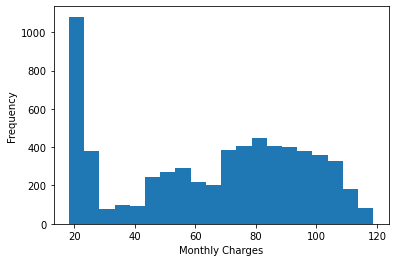

In [105]:
train.MonthlyCharges.plot(kind='hist', bins=20);
plt.xlabel('Monthly Charges');
plt.ylabel('Frequency');

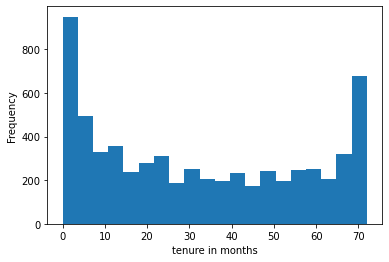

In [106]:
train.tenure.plot(kind='hist', bins=20);
plt.xlabel('tenure in months');
plt.ylabel('Frequency');

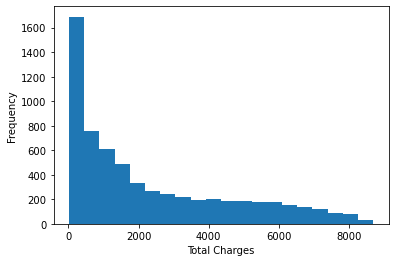

In [107]:
train.TotalChargesFloat.plot(kind='hist', bins=20);
plt.xlabel('Total Charges');
plt.ylabel('Frequency');

In [108]:
train.groupby(['SeniorCitizen','Contract','PaymentMethod'])['Churn'].agg(['mean','count'])
#Electronic Check has highest churn rates for all types of contracts, followed by Bank Transfer and Credit card
#which have similar churn rates further followed by Mailed Check

mean  count
SeniorCitizen Contract       PaymentMethod                             
0             Month-to-month Bank transfer (automatic)  0.324885    434
                             Credit card (automatic)    0.301047    382
                             Electronic check           0.511222   1203
                             Mailed check               0.289973    738
              One year       Bank transfer (automatic)  0.093103    290
                             Credit card (automatic)    0.075710    317
                             Electronic check           0.185328    259
                             Mailed check               0.065744    289
              Two year       Bank transfer (automatic)  0.027897    466
                             Credit card (automatic)    0.019190    469
                             Electronic check           0.074074    135
                             Mailed check               0.009202    326
1             Month-to-month Bank transfer (automatic)  0.388350    103
                             Credit card (automatic)    0.428571     98
                             Electronic check           0.573593    462
                             Mailed check               0.569231     65
              One year       Bank transfer (automatic)  0.066667     60
                             Credit card (automatic)    0.227273     44
                             Electronic check           0.228070     57
                             Mailed check               0.083333     12
              Two year       Bank transfer (automatic)  0.039216     51
                             Credit card (automatic)    0.052632     57
                             Electronic check           0.000000     17
                             Mailed check               0.000000      5

# Final Feature Set

Final Feature Set: all tenure types, scaled Monthly Charges, scaled Total Charges, 
    Number of Services, Senior Citizen, Month to Month, Electronic Check, 
    Paperless Billing, FiberOptic, Online Security, Tech Support, Partners, Dependents

In [109]:

def add_feature_column(df, col, mask):
    df.loc[df[mask].index,col]=1
    df[col].fillna(0,inplace=True)
    return df

In [146]:
def add_features_for_training(df):

    # tenure 0-1
    mask = (df['Tenure0-1year']==1)
    df = add_feature_column(df, col='FTenure0-1year',mask=mask)
    
    # tenure 1-2
    mask = (df['Tenure1-2year']==1)
    df = add_feature_column(df, col='FTenure1-2year',mask=mask)
    
    # tenure 2-3
    mask = (df['Tenure2-3year']==1)
    df = add_feature_column(df, col='FTenure2-3year',mask=mask)
    
    # tenure 3-4
    mask = (df['Tenure3-4year']==1)
    df = add_feature_column(df, col='FTenure3-4year',mask=mask)
    
    # tenure 4-5
    mask = (df['Tenure4-5year']==1)
    df = add_feature_column(df, col='FTenure4-5year',mask=mask)
    
    # tenure 5-6
    mask = (df['Tenure5-6year']==1)
    df = add_feature_column(df, col='FTenure5-6year',mask=mask)
    
    # Senior Citizen
    mask = (df['SeniorCitizen']==1)
    df = add_feature_column(df, col='FSeniorCitizen',mask=mask)
    
    # Contract = Month to Month
    mask = (df['MonthToMonth']==1)
    df = add_feature_column(df, col='FMonthToMonth',mask=mask)
    
    # Payment Method = Electronic Check
    mask = (df['ElectronicCheck']==1)
    df = add_feature_column(df, col='FElectronicCheck',mask=mask)
    
    # Paperless Billing
    mask = (df['PaperlessBilling']==1)
    df = add_feature_column(df, col='FPaperlessBilling',mask=mask)
    
    # Internet Service = Fiber optic
    mask = (df['FiberOptic']==1)
    df = add_feature_column(df, col='FFiberOptic',mask=mask)
     
    # Online Security
    mask = (df['OnlineSecurity']==1)
    df = add_feature_column(df, col='FOnlineSecurity',mask=mask)
    
    # Tech Support
    mask = (df['TechSupport']==1)
    df = add_feature_column(df, col='FTechSupport',mask=mask)
    
    # Partners
    mask = (df['Partner']==1)
    df = add_feature_column(df, col='FPartner',mask=mask)
    
    # Dependents
    mask = (df['Dependents']==1)
    df = add_feature_column(df, col='FDependents',mask=mask)
    
    
    # Monthly Charges
    # Total Charges
    # Number of Services
  
    return df

In [147]:
#Final Feature Set: all tenure types, scaled Monthly Charges, scaled Total Charges, 
#    Number of Services, Senior Citizen, Month to Month, Electronic Check, 
#    Paperless Billing, FiberOptic, Online Security, Tech Support, Partners, Dependents

train.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,InternetServiceBinary,PhoneServiceBinary,OnlineSecurityBinary,OnlineBackupBinary,DeviceProtectionBinary,TechSupportBinary,StreamingTVBinary,StreamingMoviesBinary,NumberOfServices,TotalChargesFloat,Tenure0-1year,Tenure1-2year,Tenure2-3year,Tenure3-4year,Tenure4-5year,Tenure5-6year,MonthlyChargesScaled,TotalChargesScaled,MonthToMonth,FiberOptic,ElectronicCheck,FTenure0-1year,FTenure1-2year,FTenure2-3year,FTenure3-4year,FTenure4-5year,FTenure5-6year,FSeniorCitizen,FMonthToMonth,FElectronicCheck,FPaperlessBilling,FFiberOptic,FOnlineSecurity,FTechSupport
5473,1208-NBVFH,1,0,1,1,20,1,0,DSL,0,0,1,0,0,0,Month-to-month,1,Electronic check,49.60,939.8,0,1,1,0,0,1,0,0,0,3,939.80,0,1,0,0,0,0,-0.498320,-0.592932,1,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2098,4137-BTIKL,1,0,0,0,2,1,1,Fiber optic,1,0,0,0,0,1,Month-to-month,0,Mailed check,90.75,174.75,0,1,1,1,0,0,0,0,1,4,174.75,1,0,0,0,0,0,0.864632,-0.929824,1,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1726,1958-RNRKS,1,0,1,0,30,1,1,DSL,0,0,0,0,0,0,Month-to-month,0,Electronic check,49.90,1441.95,0,1,1,0,0,0,0,0,0,2,1441.95,0,0,1,0,0,0,-0.488383,-0.371809,1,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1780,0516-VRYBW,0,0,0,1,18,1,0,No,2,2,2,2,2,2,One year,0,Bank transfer (automatic),20.15,390.85,1,0,1,0,0,0,0,0,0,1,390.85,0,1,0,0,0,0,-1.473750,-0.834664,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3301,2636-ALXXZ,0,1,0,0,1,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,69.60,69.6,1,1,1,0,0,0,0,0,0,2,69.60,1,0,0,0,0,0,0.164111,-0.976127,1,1,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0


# Applying data transformations to the test data. 

Were I to do this again, I would have applied the transformations to the entire dataset, rather than do it in two parts: test and train. 

In [114]:
test.Churn.replace(('Yes', 'No'), (1, 0), inplace=True)
test.Partner.replace(('Yes', 'No','No internet service'), (1, 0, 2), inplace=True)
test.Dependents.replace(('Yes', 'No','No internet service'), (1, 0, 2), inplace=True)
test.PhoneService.replace(('Yes', 'No','No internet service'), (1, 0, 2), inplace=True)
test.MultipleLines.replace(('Yes', 'No','No internet service'), (1, 0, 2), inplace=True)
test.OnlineSecurity.replace(('Yes', 'No','No internet service'), (1, 0, 2), inplace=True)
test.OnlineBackup.replace(('Yes', 'No','No internet service'), (1, 0, 2), inplace=True)
test.DeviceProtection.replace(('Yes', 'No','No internet service'), (1, 0, 2), inplace=True)
test.TechSupport.replace(('Yes', 'No','No internet service'), (1, 0, 2), inplace=True)
test.StreamingTV.replace(('Yes', 'No','No internet service'), (1, 0, 2), inplace=True)
test.PaperlessBilling.replace(('Yes', 'No','No internet service'), (1, 0, 2), inplace=True)
test.StreamingMovies.replace(('Yes', 'No','No internet service'), (1, 0, 2), inplace=True)
test.gender.replace(('Male', 'Female'), (1, 0), inplace=True)

#Creating binary columns so I can count the number of services a customer uses
test["InternetServiceBinary"] = np.where(test['InternetService'] == "No",0,1)
test["PhoneServiceBinary"] = np.where(test['PhoneService'] == 1,1,0)
test["OnlineSecurityBinary"] = np.where(test['OnlineSecurity'] == 1,1,0)
test["OnlineBackupBinary"] = np.where(test['OnlineBackup']  == 1,1,0)
test["DeviceProtectionBinary"] = np.where(test['DeviceProtection']  == 1,1,0)
test["TechSupportBinary"] = np.where(test['TechSupport']  == 1,1,0)
test["StreamingTVBinary"] = np.where(test['StreamingTV']  == 1,1,0)
test["StreamingMoviesBinary"] = np.where(test['StreamingMovies']  == 1,1,0)

#Creating a column with the count of the number of services
test["NumberOfServices"] = test['PhoneServiceBinary'] + test['InternetServiceBinary'] + test['OnlineSecurityBinary'] + test['OnlineBackupBinary'] + test['DeviceProtectionBinary'] +test['TechSupportBinary'] + test['StreamingTVBinary'] + test['StreamingMoviesBinary']

#convert Total Charges to float
test['TotalChargesFloat']= test.TotalCharges
test['TotalChargesFloat']= pd.to_numeric(test['TotalChargesFloat'],errors='coerce')

#create tenure dummy variables
test["Tenure0-1year"] = np.where(test["tenure"] <= 12, 1, 0)
test["Tenure1-2year"] = np.where((test["tenure"] <= 24) & (test['tenure'] > 12), 1, 0)
test["Tenure2-3year"] = np.where((test["tenure"] <= 36) & (test['tenure'] > 24), 1, 0)
test["Tenure3-4year"] = np.where((test["tenure"] <= 48) & (test['tenure'] > 36), 1, 0)
test["Tenure4-5year"] = np.where((test["tenure"] <= 60) & (test['tenure'] > 48), 1, 0)
test["Tenure5-6year"] = np.where((test["tenure"] <= 72) & (test['tenure'] > 60), 1, 0)


#Scale Monthly Charges and Total Charges
test['MonthlyChargesScaled'] = (test.MonthlyCharges - test.MonthlyCharges.mean())/test.MonthlyCharges.std()
test['TotalChargesScaled'] = (test.TotalChargesFloat - test.TotalChargesFloat.mean())/test.TotalChargesFloat.std()

#Create new dummys for Month to Month, Fiber Optic, and Electronic Check
test['MonthToMonth'] = np.where(test["Contract"] == 'Month-to-month', 1, 0)
test['FiberOptic'] = np.where(test["InternetService"] == 'Fiber optic', 1, 0)
test['ElectronicCheck'] = np.where(test["PaymentMethod"] == 'Electronic Check', 1, 0)

In [153]:
train = add_features_for_training(train)
test = add_features_for_training(test)

In [171]:
train = train.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
test = test.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

In [172]:
feature_list = ['FTenure0-1year','FTenure1-2year', 'FTenure2-3year', 'FTenure3-4year', 'FTenure4-5year', 
                'FTenure5-6year', 'FSeniorCitizen', 'FMonthToMonth', 'FElectronicCheck', 'FPaperlessBilling', 
                'FFiberOptic', 'FOnlineSecurity', 'FTechSupport', 'FDependents',  'FPartner',
                'MonthlyChargesScaled', 'TotalChargesScaled', 'NumberOfServices']



In [466]:
X_train = train[feature_list].copy()
X_test = test[feature_list].copy()
y_train = train['Churn']
y_test = test['Churn']

# Feature Determination

In [468]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import brier_score_loss
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate

In [469]:
logr = LogisticRegression()
# we pass in our estimator, how many features to drop at each interval, how many folds
selector_brier = RFECV(logr, step=1, cv=9, verbose=False,scoring='neg_brier_score')
selector_acc = RFECV(logr, step=1, cv=9, verbose=False,scoring='accuracy')
# we fit the selector to obtain the columns that work best with our estimator
selector_brier.fit(X_train, y_train)
selector_acc.fit(X_train, y_train)
# selector support is a boolean mask we are using to slice our column list
print(X_train.columns)
print(selector_brier.support_)
rfecv_columns = X_train.columns[selector_brier.support_]
print(rfecv_columns)

/Users/andrewyaholkovsky/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/andrewyaholkovsky/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules

Index(['FTenure0-1year', 'FTenure1-2year', 'FTenure2-3year', 'FTenure3-4year',
       'FTenure4-5year', 'FTenure5-6year', 'FSeniorCitizen', 'FMonthToMonth',
       'FElectronicCheck', 'FPaperlessBilling', 'FFiberOptic',
       'FOnlineSecurity', 'FTechSupport', 'FDependents', 'FPartner',
       'MonthlyChargesScaled', 'TotalChargesScaled', 'NumberOfServices'],
      dtype='object')
[ True False  True False False  True  True  True False  True  True  True
  True  True False  True  True False]
Index(['FTenure0-1year', 'FTenure2-3year', 'FTenure5-6year', 'FSeniorCitizen',
       'FMonthToMonth', 'FPaperlessBilling', 'FFiberOptic', 'FOnlineSecurity',
       'FTechSupport', 'FDependents', 'MonthlyChargesScaled',
       'TotalChargesScaled'],
      dtype='object')


In [470]:
print(X_train.columns)
print(selector_acc.support_)
X_train.columns[selector_acc.support_]

Index(['FTenure0-1year', 'FTenure1-2year', 'FTenure2-3year', 'FTenure3-4year',
       'FTenure4-5year', 'FTenure5-6year', 'FSeniorCitizen', 'FMonthToMonth',
       'FElectronicCheck', 'FPaperlessBilling', 'FFiberOptic',
       'FOnlineSecurity', 'FTechSupport', 'FDependents', 'FPartner',
       'MonthlyChargesScaled', 'TotalChargesScaled', 'NumberOfServices'],
      dtype='object')
[ True False  True False  True  True  True  True False  True  True  True
  True  True False  True  True  True]


Index(['FTenure0-1year', 'FTenure2-3year', 'FTenure4-5year', 'FTenure5-6year',
       'FSeniorCitizen', 'FMonthToMonth', 'FPaperlessBilling', 'FFiberOptic',
       'FOnlineSecurity', 'FTechSupport', 'FDependents',
       'MonthlyChargesScaled', 'TotalChargesScaled', 'NumberOfServices'],
      dtype='object')

In [471]:
rfc_params = {
    'max_depth':[None],
    'min_samples_split':[16,20,24],
    'min_impurity_decrease':[.0,.0001,.0002]}

# I pass in our estimator, our dictionary of parameters, and the number of folds
rfc_gs = GridSearchCV(RandomForestClassifier(n_estimators=100), rfc_params, cv=5,
                      verbose=1,scoring='neg_brier_score')
# I fit the grid search object
rfc_gs.fit(X_train[rfecv_columns], y_train)
# once fit, I can access our models best parameters as well as other attributes
print(rfc_gs.best_score_)
rfc_gs.best_params_

Fitting 5 folds for each of 9 candidates, totalling 45 fits
-0.13613927035759443


{'max_depth': None, 'min_impurity_decrease': 0.0001, 'min_samples_split': 20}

In [472]:
scores = cross_validate(logr, X_train[rfecv_columns], y_train,cv=5,scoring='neg_brier_score')
print(scores['test_score'].mean())

-0.1387361840636084


# Logistic Regression

In [473]:
# instantiate
logr = LogisticRegression()
# fit on training data, happens inplace
logr.fit(X_train,y_train)

LogisticRegression()

In [474]:
X_test['preds'] = logr.predict_proba(X_test)[:,1:]
brier_score_loss(y_test,X_test.preds)

0.14810423991783608

In [475]:
# we can pull out out our preds and look at them
# what did the model seem to do that we couldn't have accomplished just using some averages instead?
X_test.drop_duplicates(subset=feature_list).sort_values('preds',ascending=False)

,FTenure0-1year,FTenure1-2year,FTenure2-3year,FTenure3-4year,FTenure4-5year,FTenure5-6year,FSeniorCitizen,FMonthToMonth,FElectronicCheck,FPaperlessBilling,FFiberOptic,FOnlineSecurity,FTechSupport,FDependents,FPartner,MonthlyChargesScaled,TotalChargesScaled,NumberOfServices,preds
31,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.018230,-0.930105,5,0.847501
4517,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.157130,-0.504418,5,0.841333
6626,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.026804,-0.754325,5,0.839003
6179,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.006227,-0.564289,4,0.826914
5783,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.805593,-0.971506,4,0.824399
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3705,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,-0.151274,0.808507,4,0.014361
5422,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,-0.108404,0.950148,6,0.013199
2899,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,-0.406782,0.731757,6,0.012981
6940,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,-0.348478,0.727902,6,0.011612


In [486]:
X_test["prediction"] = np.where(X_test['preds'] > .5,1,0)

In [487]:
print((metrics.accuracy_score(y_test, X_test['prediction'])))
print(metrics.mean_squared_error(y_test, X_test['prediction']))
print(metrics.roc_auc_score(y_test, X_test['prediction']))

0.7923186344238976
0.20768136557610242
0.7061808382546872


Feature: 0, Score: 0.72743
Feature: 1, Score: -0.05323
Feature: 2, Score: -0.20228
Feature: 3, Score: -0.03075
Feature: 4, Score: -0.08079
Feature: 5, Score: -0.37042
Feature: 6, Score: 0.26461
Feature: 7, Score: 1.15438
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.42730
Feature: 10, Score: 0.17295
Feature: 11, Score: -0.47022
Feature: 12, Score: -0.40774
Feature: 13, Score: -0.19143
Feature: 14, Score: 0.02333
Feature: 15, Score: 0.92070
Feature: 16, Score: -0.41072
Feature: 17, Score: -0.03341


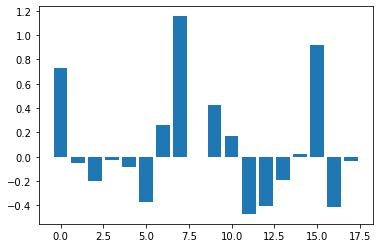

In [447]:
#Feature Importance

from matplotlib import pyplot
importance = logr.coef_[0]
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

Feature 0: Tenure 0-1yr
Feature 7: SeniorCitizen
Feature 15: Partner

In [488]:
precision = precision_score(X_test['prediction'], y_test)
print('Precision: %f' % precision)
recall = recall_score(X_test['prediction'], y_test)
print('Recall: %f' % recall)

Precision: 0.485981
Recall: 0.742857


# KNN

In [459]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [460]:
X_train = train[feature_list].copy()
X_test = test[feature_list].copy()
y_train = train['Churn']
y_test = test['Churn']

In [461]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [462]:
y_pred_class = knn.predict(X_test)
print((metrics.accuracy_score(y_test, y_pred_class)))
print((metrics.mean_squared_error(y_test, y_pred_class)))
print(metrics.roc_auc_score(y_test, y_pred_class))

precision = precision_score(y_pred_class, y_test)
print('Precision: %f' % precision)
recall = recall_score(y_pred_class, y_test)
print('Recall: %f' % recall)

0.7524893314366998
0.24751066856330015
0.6486439997706553
Precision: 0.383178
Recall: 0.661290


# Random Forest

In [463]:
X_train = train[feature_list].copy()
X_test = test[feature_list].copy()
y_train = train['Churn']
y_test = test['Churn']

In [464]:
rf = RandomForestClassifier(n_estimators=1000, max_depth=None, max_features='auto')

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.ensemble import RandomForestClassifier


rf.fit(X_train, y_train)
y_hat = rf.predict(X_test)

print('accuracy: ',(metrics.accuracy_score(y_test, y_hat)))
print('mse: ',(metrics.mean_squared_error(y_test, y_hat)))
print('AUC: ',(metrics.roc_auc_score(y_test, y_hat)))

precision = precision_score(y_hat, y_test)
print('Precision: %f' % precision)
recall = recall_score(y_hat, y_test)
print('Recall: %f' % recall)

accuracy:  0.7610241820768137
mse:  0.23897581792318634
AUC:  0.6771161821760985
Precision: 0.462617
Recall: 0.651316


# Decision Tree

In [465]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth=None, max_features='auto')
dtc.fit(X_train, y_train)
dtc_y = dtc.predict(X_test)
print('accuracy: ',(metrics.accuracy_score(y_test, dtc_y)))
print('mse: ',(metrics.mean_squared_error(y_test, dtc_y)))
print('AUC: ',metrics.roc_auc_score(y_test, dtc_y))

precision = precision_score(dtc_y, y_test)
print('Precision: %f' % precision)
recall = recall_score(dtc_y, y_test)
print('Recall: %f' % recall)

accuracy:  0.716927453769559
mse:  0.283072546230441
AUC:  0.6454188406628061
Precision: 0.462617
Recall: 0.540984


Feature: 0, Score: 0.72743
Feature: 1, Score: -0.05323
Feature: 2, Score: -0.20228
Feature: 3, Score: -0.03075
Feature: 4, Score: -0.08079
Feature: 5, Score: -0.37042
Feature: 6, Score: 0.26461
Feature: 7, Score: 1.15438
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.42730
Feature: 10, Score: 0.17295
Feature: 11, Score: -0.47022
Feature: 12, Score: -0.40774
Feature: 13, Score: -0.19143
Feature: 14, Score: 0.02333
Feature: 15, Score: 0.92070
Feature: 16, Score: -0.41072
Feature: 17, Score: -0.03341


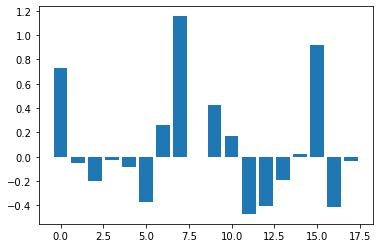

In [448]:
dtc_importance = dtc.feature_importances_
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

# Next Steps

Logistic Regression is clearly the best model; it produced the highest accuracy and AUC as well as the lowest MSE.

If I were making recommendations to the business, I would advise them to:

1. run current population of customers through model - see who's at risk of downgrading
b) think about ways of treating those who are at risk of downgrading (deals, one-time credits, etc.)
c) think about ways of nudging people towards longer contracts, not using electronic checks, etc. so they are less likely to downgrade

2. think about ways of treating those who are at risk of downgrading (deals, one-time credits, etc.)

3.  think about ways of nudging people towards longer contracts, not using electronic checks, etc. so they are less likely to downgrade